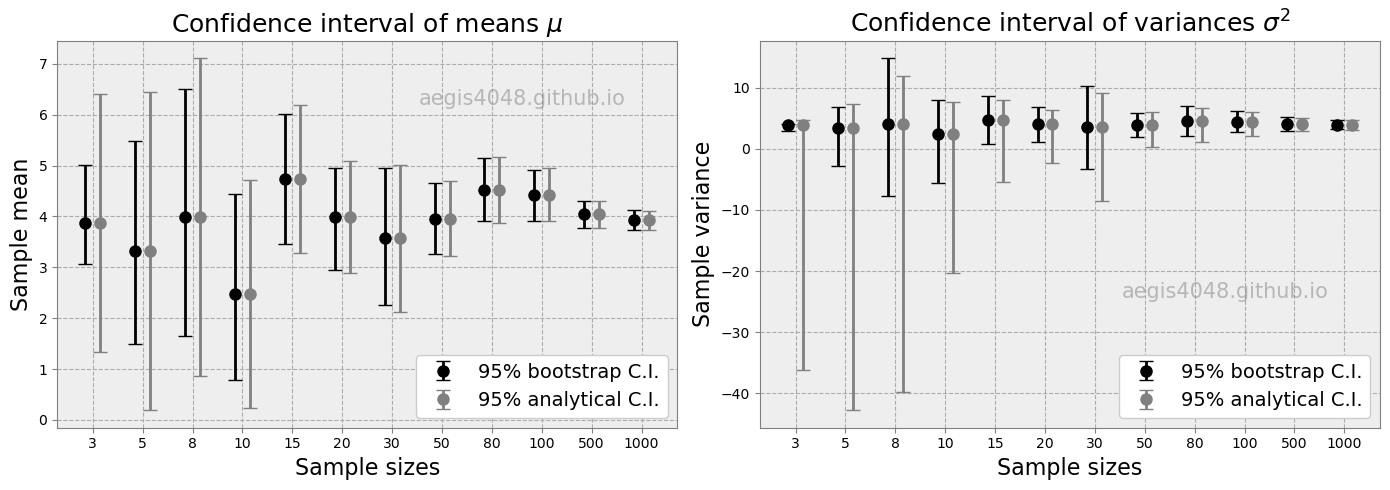

In [1]:

"""
Copied from https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers
"""
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sample_sizes = [3, 5, 8, 10, 15, 20, 30, 50, 80, 100, 500, 1000]
mean = 4            # sample mean
std = 3             # sample standard deviation
boot_iter = 10000   # bootstrap iterations

boot_mean_lo = np.array([])
boot_mean_hi = np.array([])
analy_mean_lo = np.array([])
analy_mean_hi = np.array([])

boot_var_lo = np.array([])
boot_var_hi = np.array([])
analy_var_lo = np.array([])
analy_var_hi = np.array([])

means = np.array([])
variances = np.array([])

for size in sample_sizes:

    np.random.seed(size * 5)

    arr = np.random.normal(mean, std, size) # randomly draw from a normal distribution

    # analytical confidence interval of mean
    means = np.append(means, np.mean(arr))
    analy_conf_mean = stats.t.interval(1 - 0.05, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))
    analy_mean_lo = np.append(analy_mean_lo, analy_conf_mean[0])
    analy_mean_hi = np.append(analy_mean_hi, analy_conf_mean[1])

    # bootstrap confidence interval of mean
    boot_means = [np.mean(np.random.choice(arr, len(arr))) for _ in range(boot_iter)]
    boot_mean_lo = np.append(boot_mean_lo, np.percentile(boot_means, 2.5))
    boot_mean_hi = np.append(boot_mean_hi, np.percentile(boot_means, 97.5))

    # analytical confidence interval of variance
    variances = np.append(variances, np.var(arr, ddof=1))
    analy_conf_var = (
        (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(1 - 0.05 / 2, len(arr) - 1),
        (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(0.05 / 2, len(arr) - 1)
    )
    analy_var_lo = np.append(analy_var_lo, analy_conf_var[0])
    analy_var_hi = np.append(analy_var_hi, analy_conf_var[1])

    # bootstrap confidence interval of variance
    boot_vars = [np.var(np.random.choice(arr, len(arr)), ddof=1) for _ in range(boot_iter)]
    boot_var_lo = np.append(boot_var_lo, np.percentile(boot_vars, 2.5))
    boot_var_hi = np.append(boot_var_hi, np.percentile(boot_vars, 97.5))


# plotting

def styling(ax, xticks, xticklables):
    ax.legend(fontsize=14, loc='lower right', framealpha=1, frameon=True)
    ax.set_xlabel('Sample sizes', fontsize=16)
    ax.set_facecolor('#eeeeee')
    ax.grid(True, linestyle='--', color='#acacac')
    ax.tick_params(color='grey')
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(label) for label in xticklables])
    _ = [spine.set_edgecolor('grey') for spine in ax.spines.values()]


x = np.array([i for i in range(len(sample_sizes))])
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].errorbar(x - 0.15, means, yerr=[abs(boot_mean_lo - means), abs(boot_mean_hi - means)],
            fmt='o', label='95% bootstrap C.I.', color='k', markersize=8, capsize=5, linewidth=2)
axes[0].errorbar(x + 0.15, means, yerr=np.array([abs(analy_mean_hi - means), abs(analy_mean_lo - means)]),
            fmt='o', label='95% analytical C.I.', color='grey', markersize=8, capsize=5, linewidth=2)

styling(axes[0], x, sample_sizes)
axes[0].set_ylabel('Sample mean', fontsize=16)
axes[0].set_title('Confidence interval of means $\mu$', fontsize=18)
axes[0].text(0.75, 0.85, 'aegis4048.github.io', fontsize=15, ha='center', va='center',
        transform=axes[0].transAxes, color='grey', alpha=0.5);

axes[1].errorbar(x - 0.15, means, yerr=[abs(boot_var_lo - variances), abs(boot_var_hi - variances)],
            fmt='o', label='95% bootstrap C.I.', color='k', markersize=8, capsize=5, linewidth=2)
axes[1].errorbar(x + 0.15, means, yerr=np.array([abs(analy_var_hi - variances), abs(analy_var_lo - variances)]),
            fmt='o', label='95% analytical C.I.', color='grey', markersize=8, capsize=5, linewidth=2)

styling(axes[1], x, sample_sizes)
axes[1].set_ylabel('Sample variance', fontsize=16)
axes[1].set_title('Confidence interval of variances $\sigma^2$', fontsize=18)
axes[1].text(0.75, 0.35, 'aegis4048.github.io', fontsize=15, ha='center', va='center',
        transform=axes[1].transAxes, color='grey', alpha=0.5);

fig.tight_layout()



In [1]:
# Load the results csv.
import os
import pandas as pd
path_Pulsewatch_CI = r'/mnt/r/ENGR_Chon/Dong/Python_generated_results/deep_learning_2023/analysis_2024_07_30/AUROC_all_pulsewatch_subject_independent_test_CI'
filename_Pulsewatch_CI = 'CI_all_models.csv'
path_MIMICIII_CI = r'/mnt/r/ENGR_Chon/Dong/Python_generated_results/deep_learning_2023/analysis_2024_07_30/AUROC_MIMICIII_CI'
filename_MIMICIII_CI = 'CI_all_models.csv'
path_Simband_CI = r'/mnt/r/ENGR_Chon/Dong/Python_generated_results/deep_learning_2023/analysis_2024_07_30/AUROC_Simband_CI'
filename_Simband_CI = 'CI_all_models.csv'

df_Pulsewatch = pd.read_csv(os.path.join(path_Pulsewatch_CI,filename_Pulsewatch_CI)) # index_col=0
df_MIMICIII = pd.read_csv(os.path.join(path_MIMICIII_CI,filename_MIMICIII_CI)) # index_col=0
df_Simband = pd.read_csv(os.path.join(path_Simband_CI,filename_Simband_CI)) # index_col=0

/home/doh16101/anaconda3/envs/CS330_torch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [12]:
df_Simband

,str_model_idx,model_name,micro_auroc,macro_auroc,micro_lower_bound,micro_upper_bound,macro_lower_bound,macro_upper_bound
0,18,Liu_2022_JAHA_retrained_Pulsewatch_PPG_only,95.435776,92.489568,95.415755,95.501985,92.520148,92.646797
1,19,Liu_2022_JAHA_retrained_Pulsewatch_four_channels,96.008451,93.566105,96.004261,96.063800,93.577382,93.694756
2,20,Darren_2024_EMBC,93.465169,88.351715,93.426468,93.495057,88.297477,88.487992
3,3,1D_PPG_batch32,95.455066,92.917539,95.423425,95.498989,92.922677,93.080121
4,21,1D_PPG_ACC_only,91.407456,89.677455,91.371764,91.468614,89.680081,89.813193
5,22,1D_HR_only,97.183642,95.954757,97.164167,97.230863,95.968826,96.034325
6,7,1D_HR_ACC_noPPG,94.799805,94.317453,94.787865,94.855536,94.343668,94.436186
7,23,1D_HR_rescaleHR_only,97.344594,96.222157,97.360397,97.400831,96.250939,96.333402
8,24,1D_HR_rescaleHR_ACC_noPPG,94.941768,94.832083,94.903915,94.996953,94.802847,94.888566
9,5,1D_PPG_HR,96.921718,94.995529,96.870257,96.950071,94.930639,95.039331


In [2]:
# In the Pulsewatch dataframe, the AUROCs are redundent for each class. So I only keep the first class's AUROC.
model_name = df_MIMICIII['model_name'].to_list()
keep_index = []
for this_model_name in model_name:
    temp_df = df_Pulsewatch.loc[df_Pulsewatch['model_name'] == this_model_name]
    temp_df = temp_df.loc[temp_df['class'] == 0] # Only keep the first row
    keep_index.append(temp_df.index[0])
df_Pulsewatch_unique = df_Pulsewatch.loc[keep_index]

In [6]:
def my_convert_model_name(model_name):

    if model_name == 'Liu_2022_JAHA_retrained_Pulsewatch_PPG_only':
        output_name = '01: 1D-VGG-16 (PPG only)'
    elif model_name == 'Liu_2022_JAHA_retrained_Pulsewatch_four_channels':
        output_name = '02: 1D-VGG-16 (four channels)'
    elif model_name == 'Darren_2024_EMBC':
        output_name = '03: 2D DenseNet (2D TFS)'
    elif model_name == '1D_PPG_batch32':
        output_name = '04: (Ours) PPG only'
    elif model_name == '1D_PPG_ACC_only':
        output_name = '05: (Ours) PPG + ACC'
    elif model_name == '1D_HR_only':
        output_name = '06: (Ours) HR only'
    elif model_name == '1D_HR_ACC_noPPG':
        output_name = '07: (Ours) HR + ACC'

    elif model_name == '1D_HR_rescaleHR_only':
        output_name = '08: (Ours) HR + magHR'
    elif model_name == '1D_HR_rescaleHR_ACC_noPPG':
        output_name = '09: (Ours) HR + magHR + ACC'

    elif model_name == '1D_PPG_HR':
        output_name = '10: (Ours) PPG + HR'
    elif model_name == '1D_PPG_HR_ACC':
        output_name = '11: (Ours) PPG + HR + ACC'

    elif model_name == '1D_PPG_WEPD-HR_ACC_rescale-WEPD-HR':
        output_name = '12: (Ours) PPG + HR + ACC + magHR (best model)'
    elif model_name == '1D_PPG_Elgendi-HR_ACC_rescale-Elgendi-HR':
        output_name = '13: (Ours) PPG + HR + ACC + magHR (Elgendi et al. PPG peaks)'
    elif model_name == '1D_PPG_WEPD-HR_ACC_rescale-HR_aug5k':
        output_name = '14: (Ours) PPG + HR + ACC + magHR (agumented PAC/PVC)'
    return output_name

In [4]:
# Copied https://scottplot.net/cookbook/4.1/colors/#category-20

color_20 = [
'#7F7F7F', # gray
'#616161', # darker gray
'#E69F00',
'#56B4E9',
'#009E73',
'#000000',#'#D55E00',
'#0072B2',
'#D62728', # red
'#CC79A7',
'#E7298A'
]

# color_20 = [
# '#000000', # black
# '#7F7F7F', # dark grey
# '#1F77B4', # darker blue
# '#17BECF', # brighter blue

# '#FF6F00', # orange
# '#EBCB8B', # light yellow
# '#D62728', # red
# '#98DF8A', # light green
# '#013A20', # dark green

# '#2CA02C', # green
# '#E7298A',
# '#68B9C0', # another type of green
# '#76846E', # another type of dark green
# '#F7B6D2',
# '#7F7F7F',
# '#C7C7C7',
# '#BCBD22',
# '#DBDB8D',
# '#17BECF',
# '#9EDAE5'
# ]




df_Pulsewatch_unique
    str_model_idx                                        model_name  class  \
0              18       Liu_2022_JAHA_retrained_Pulsewatch_PPG_only      0   
3              19  Liu_2022_JAHA_retrained_Pulsewatch_four_channels      0   
6              20                                  Darren_2024_EMBC      0   
9               3                                    1D_PPG_batch32      0   
12             21                                   1D_PPG_ACC_only      0   
15             22                                        1D_HR_only      0   
18              7                                   1D_HR_ACC_noPPG      0   
21             23                              1D_HR_rescaleHR_only      0   
24             24                         1D_HR_rescaleHR_ACC_noPPG      0   
27              5                                         1D_PPG_HR      0   
30              6                                     1D_PPG_HR_ACC      0   
33              8                1D_PPG_WEP

/tmp/ipykernel_23354/3362110655.py:71: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  (_, caps, _) = axes[0].errorbar(x[count], AUROC[count], yerr=[[abs(AUROC_lower[count] - AUROC[count])], [abs(AUROC_upper[count] - AUROC[count])]],
/tmp/ipykernel_23354/3362110655.py:98: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  (_, caps, _) = axes[1].errorbar(x[count], AUROC[count], yerr=[[abs(AUROC_lower[count] - AUROC[count])], [abs(AUROC_upper[count] - AUROC[count])]],
/tmp/ipykernel_23354/3362110655.py:124: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  (_, caps, _) = axes[2].errorbar(x[count], AUROC[count], yerr=[[abs(AUROC_lower[count] - AUROC[count])], [

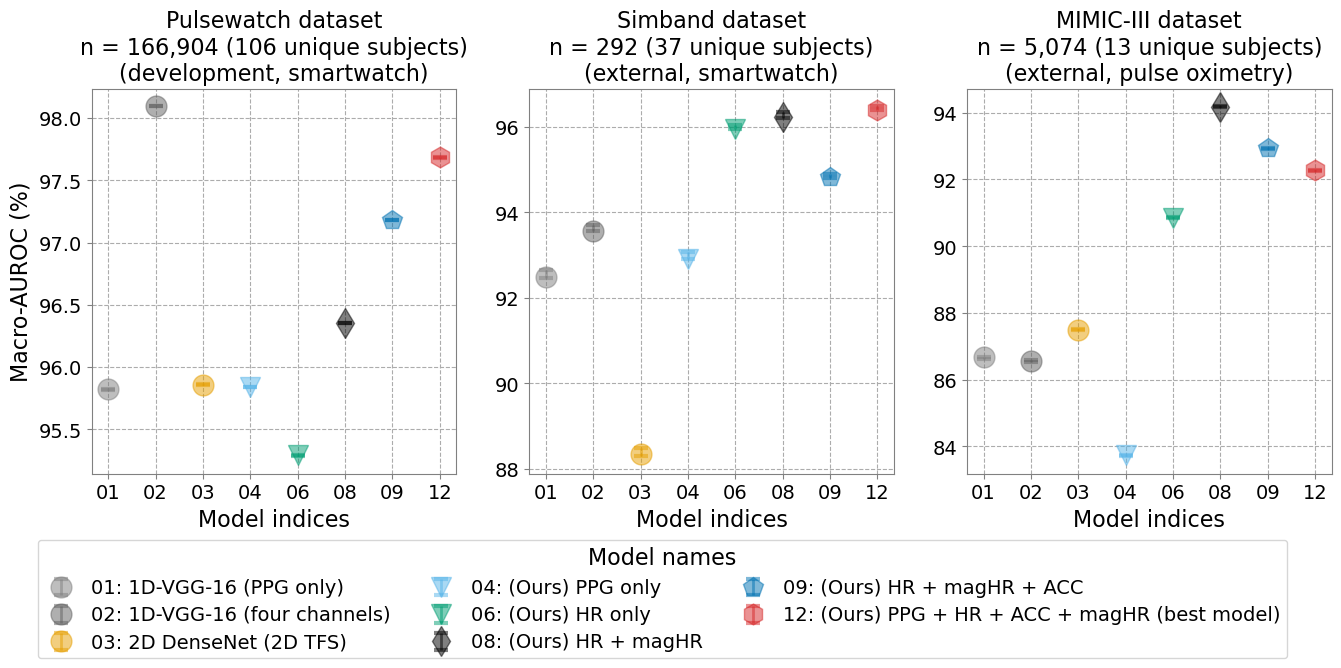

In [7]:
# list_str_model_idx = ['18','20','03','21','22','07','23','24','05','06','08','10','12'] # Remove Liu four channels and ResNet 2DTFS and 2DPoin
list_str_model_idx = ['18','19','20','03','22','23','24','08'] # Remove Liu four channels and ResNet 2DTFS and 2DPoin
my_marker_type = ['o','o','o','v','v','d','p','h',]
import sys
sys.path.append('/mnt/r/ENGR_Chon/Dong/Github_private/Pulsewatch_labeling/DeepBeat/experiments/try_07_eval_models')
import my_model_names


import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
# plotting

my_marker_size = 15
my_line_width = 2
my_markeredgewidth = 3
def styling(ax, xticks, xticklables):
    # ax.legend(fontsize=14, loc='lower right', framealpha=1, frameon=True)
    # ax.set_xlabel('Sample sizes', fontsize=16)
    ax.set_facecolor('white')
    ax.grid(True, linestyle='--', color='#acacac')
    ax.tick_params(color='grey')
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(label) for label in xticklables])
    _ = [spine.set_edgecolor('grey') for spine in ax.spines.values()]

# Plot the Pulsewatch dataset first.
x = np.array([i for i in range(len(list_str_model_idx))])
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Using the subset of models.
print('df_Pulsewatch_unique')
print(df_Pulsewatch_unique)

keep_index = []
for count, str_model_idx in enumerate(list_str_model_idx):
    path_ckpt, file_date, model_name = my_model_names.my_model_names(str_model_idx)
    temp_df = df_Pulsewatch_unique.loc[df_Pulsewatch_unique['model_name'] == model_name]
    print('temp_df',temp_df)
    keep_index.append(temp_df.index[0])
df_Pulsewatch_subset = df_Pulsewatch_unique.loc[keep_index]

# Using the subset of models.
keep_index = []
for count, str_model_idx in enumerate(list_str_model_idx):
    path_ckpt, file_date, model_name = my_model_names.my_model_names(str_model_idx)
    temp_df = df_Simband.loc[df_Simband['model_name'] == model_name]
    print('temp_df',temp_df)
    keep_index.append(temp_df.index[0])
df_Simband_subset = df_Simband.loc[keep_index]

# Using the subset of models.
keep_index = []
for count, str_model_idx in enumerate(list_str_model_idx):
    path_ckpt, file_date, model_name = my_model_names.my_model_names(str_model_idx)
    temp_df = df_MIMICIII.loc[df_MIMICIII['model_name'] == model_name]
    print('temp_df',temp_df)
    keep_index.append(temp_df.index[0])
df_MIMICIII_subset = df_MIMICIII.loc[keep_index]

AUROC = df_Pulsewatch_subset.macro_auroc.unique()
AUROC_lower = df_Pulsewatch_subset.macro_lower_bound.unique()
AUROC_upper = df_Pulsewatch_subset.macro_upper_bound.unique()

axis_model_name = []
for count, str_model_idx in enumerate(list_str_model_idx):
    path_ckpt, file_date, model_name = my_model_names.my_model_names(str_model_idx)
    this_converted_name = my_convert_model_name(model_name)
    temp_yerr = [abs(AUROC_lower[count] - AUROC[count]), abs(AUROC_upper[count] - AUROC[count])]
    temp_yerr = np.array(temp_yerr)
    (_, caps, _) = axes[0].errorbar(x[count], AUROC[count], yerr=[[abs(AUROC_lower[count] - AUROC[count])], [abs(AUROC_upper[count] - AUROC[count])]],
                fmt='o', color=color_20[count], markersize=my_marker_size, capsize=5, linewidth=my_line_width,
                marker=my_marker_type[count],alpha=.5)
    axis_model_name.append(this_converted_name[:2])

    for cap in caps:
        # cap.set_color('red')
        cap.set_markeredgewidth(my_markeredgewidth)
styling(axes[0], x, axis_model_name)
axes[0].set_ylabel('Macro-AUROC (%)', fontsize=16)
axes[0].set_xlabel('Model indices', fontsize=16)
axes[0].set_title('Pulsewatch dataset\nn = 166,904 (106 unique subjects)\n(development, smartwatch)', fontsize=16)
axes[0].xaxis.set_tick_params(labelsize=14)
axes[0].yaxis.set_tick_params(labelsize=14)

# Plot the Simband dataset second.
x = np.array([i for i in range(len(list_str_model_idx))])

AUROC = df_Simband_subset.macro_auroc.unique()
AUROC_lower = df_Simband_subset.macro_lower_bound.unique()
AUROC_upper = df_Simband_subset.macro_upper_bound.unique()
axis_model_name = []
for count, str_model_idx in enumerate(list_str_model_idx):
    path_ckpt, file_date, model_name = my_model_names.my_model_names(str_model_idx)
    this_converted_name = my_convert_model_name(model_name)
    temp_yerr = [abs(AUROC_lower[count] - AUROC[count]), abs(AUROC_upper[count] - AUROC[count])]
    temp_yerr = np.array(temp_yerr)
    (_, caps, _) = axes[1].errorbar(x[count], AUROC[count], yerr=[[abs(AUROC_lower[count] - AUROC[count])], [abs(AUROC_upper[count] - AUROC[count])]],
                fmt='o', color=color_20[count], markersize=my_marker_size, capsize=5, linewidth=my_line_width,
                marker=my_marker_type[count],alpha=.5)
    axis_model_name.append(this_converted_name[:2])
    
    for cap in caps:
        # cap.set_color('red')
        cap.set_markeredgewidth(my_markeredgewidth)
styling(axes[1], x, axis_model_name)
# x_all = np.concatenate((x_all, x), axis=0)
axes[1].set_xlabel('Model indices', fontsize=16)
axes[1].set_title('Simband dataset\nn = 292 (37 unique subjects)\n(external, smartwatch)', fontsize=16)
axes[1].xaxis.set_tick_params(labelsize=14)
axes[1].yaxis.set_tick_params(labelsize=14)
# Plot the MIMICIII dataset third.
x = np.array([i for i in range(len(list_str_model_idx))])

AUROC = df_MIMICIII_subset.macro_auroc.unique()
AUROC_lower = df_MIMICIII_subset.macro_lower_bound.unique()
AUROC_upper = df_MIMICIII_subset.macro_upper_bound.unique()
axis_model_name = []
for count, str_model_idx in enumerate(list_str_model_idx):
    path_ckpt, file_date, model_name = my_model_names.my_model_names(str_model_idx)
    this_converted_name = my_convert_model_name(model_name)
    temp_yerr = [abs(AUROC_lower[count] - AUROC[count]), abs(AUROC_upper[count] - AUROC[count])]
    temp_yerr = np.array(temp_yerr)
    (_, caps, _) = axes[2].errorbar(x[count], AUROC[count], yerr=[[abs(AUROC_lower[count] - AUROC[count])], [abs(AUROC_upper[count] - AUROC[count])]],
                fmt='o', label=this_converted_name, color=color_20[count], markersize=my_marker_size, capsize=5, linewidth=my_line_width,
                marker=my_marker_type[count],alpha=.5)
    axis_model_name.append(this_converted_name[:2])
    
    for cap in caps:
        # cap.set_color('red')
        cap.set_markeredgewidth(my_markeredgewidth)
styling(axes[2], x, axis_model_name)
axes[2].set_xlabel('Model indices', fontsize=16)
axes[2].set_title('MIMIC-III dataset\nn = 5,074 (13 unique subjects)\n(external, pulse oximetry)', fontsize=16)
axes[2].xaxis.set_tick_params(labelsize=14)
axes[2].yaxis.set_tick_params(labelsize=14)
# Put a legend below current axis
# legend = axes[2].legend(loc='upper center', bbox_to_anchor=(1.8, 1.1),title='Model names',
#           fancybox=True, shadow=True, ncol=1, fontsize=12)
legend = axes[2].legend(loc='upper right', bbox_to_anchor=(0.9,-0.15),title='Model names',
          fancybox=True, shadow=False, ncol=3, fontsize=12)
# plt.suptitle('Subject-independent testing with 95% confidence interval', fontsize=18)
legend.get_title().set_fontsize('16') #legend 'Title' fontsize
plt.setp(plt.gca().get_legend().get_texts(), fontsize='14') #legend 'list' fontsize
fig.tight_layout()

path_plot = r'/mnt/r/ENGR_Chon/Dong/Postdoc/ppg_open_data/my_paper/NPJ_digital_medicine'
plt.savefig(os.path.join(path_plot,'Pulsewatch_Simband_MIMICIII_test_CI_2024_10_01'+'.png'), dpi=300, bbox_inches='tight',pad_inches = 0.1)
 